In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sklearn

In [4]:
from common.visualize.colors import COLORS

In [5]:
from sklearn import datasets
dataset = datasets.load_digits()

In [6]:
dataset.data.shape

(1797, 64)

In [7]:
X=dataset.data
Y=dataset.target

In [8]:
std(X,0)

array([ 0.        ,  0.90693964,  4.75350317,  4.24765948,  4.28619491,
        5.66484088,  3.32484969,  1.03709417,  0.09419533,  3.19527098,
        5.41994694,  3.97643575,  4.78134964,  6.05127561,  3.58532293,
        0.82768465,  0.06235094,  3.57530605,  5.68918332,  5.80104695,
        6.17400993,  6.19559718,  3.25896254,  0.43847543,  0.03334258,
        3.14565685,  6.19031469,  5.88129939,  6.15038083,  5.87092136,
        3.68543009,  0.04712725,  0.        ,  3.4794038 ,  6.32292731,
        6.26664682,  5.93183902,  5.86901393,  3.53629836,  0.        ,
        0.14514503,  2.98098645,  6.53613529,  6.43958504,  6.25776954,
        5.69394162,  4.32974601,  0.30727036,  0.20416633,  1.74566694,
        5.64292531,  5.22549314,  5.30057302,  6.02947606,  4.91803706,
        0.98412698,  0.02358333,  0.9340418 ,  5.1015993 ,  4.37347662,
        4.93257433,  5.89898069,  4.08940957,  1.85960409])

In [9]:
inds = arange(len(X))
random.seed(0)
random.shuffle(inds)

In [10]:
N = len(X)
N_split = int(0.7*N) 
X_train, Y_train = X[inds[:N_split]], Y[inds[:N_split]]
X_val, Y_val = X[inds[N_split:]], Y[inds[N_split:]]

#### How many classes distinct classes are there?

In [11]:
unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Are the classes equally distributed?

In [12]:
unique(Y, return_counts=1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

#### Visualize data in first 2 principal components

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(random_state=0)

In [15]:
pca.fit(X_train)
Z_train = pca.transform(X_train)

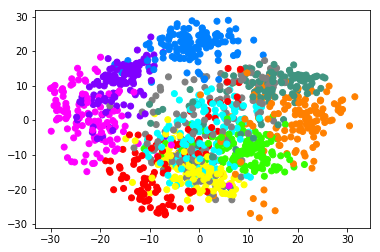

In [17]:
scatter(Z_train[:,0], Z_train[:,1], c=[COLORS[y] for y in Y_train])

#### How many variance is explained by each principal component?

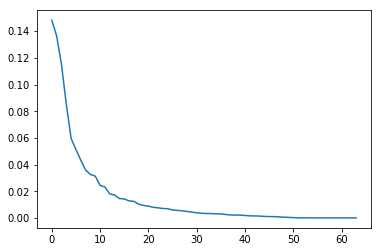

In [18]:
plot(pca.explained_variance_ratio_)

#### How much variance is explained by first 2 components?

In [19]:
sum(pca.explained_variance_ratio_[:2])  # 

0.28462566384318433

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
KK=arange(1,20)
accuracies=zeros(KK.shape)
for i,K in enumerate(KK):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, Y_train)
    Y_hat = knn.predict(X_val)
    accuracies[i] = sklearn.metrics.accuracy_score(Y_hat, Y_val)

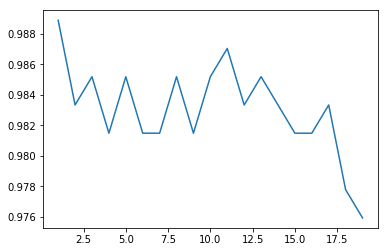

In [22]:
plot(KK,accuracies)